<a href="https://colab.research.google.com/github/1ArgoS1/DeepLearningModels/blob/master/dtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Decision tree implementation from scratch   
###by - *Ambuj Kumar Pandit(MIT2021100)*
---


In this notebook, I will implement the decision tree and use it to learn the data as given by this [dataset](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation). We will first import the dataset from the website using wget as the dataset size is small and makes notebook portable. We then make the model using sklearn.DecisionTreeClassifier and fit the data into it. We will also split the data into training and testing part for metric evaluation. Finally we will draw conclusions and plot the final tree obtained by hyperparameter tuning. 



# Data import 

We will import the data and see its structure for further processing. 

In [19]:
!wget  http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
df = pd.read_csv("car.data")

--2022-02-05 03:28:51--  http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data.1’

car.data.1          100%[===================>]  50.65K   196KB/s    in 0.3s    

2022-02-05 03:28:52 (196 KB/s) - ‘car.data.1’ saved [51867/51867]



In [20]:
df.info()
print(df.head())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


(1727, 7)

As, we can observe, the dataset has 7 columns and 1727 row entries. Also on viewing the dataset, we conclude that there are no missing values/error fields in the data. Hence we can skip the data cleaning part. Also the 7 columns are unnamed so we will assign the names to the columns. From the dataset [website](http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names), we infer,

---
4. Relevant Information Paragraph:

   Car Evaluation Database was derived from a simple hierarchical
   decision model originally developed for the demonstration of DEX
   (M. Bohanec, V. Rajkovic: Expert system for decision
   making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
   cars according to the following concept structure:

   CAR                      car acceptability
   . PRICE                  overall price
   . . buying               buying price
   . . maint                price of the maintenance
   . TECH                   technical characteristics
   . . COMFORT              comfort
   . . . doors              number of doors
   . . . persons            capacity in terms of persons to carry
   . . . lug_boot           the size of luggage boot
   . . safety               estimated safety of the car


---



In [21]:
df = df.set_axis(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'],axis=1,inplace=False)
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


This looks perfect now to feed into our model. We will now define the feature vectors and target variable. Also we will divide it for testing and training parts.

In [22]:
X = df.drop(['class'], axis=1)
y = df['class']

# seperate the training and testing components. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape


((1381, 6), (346, 6))

This shows that the split is successful. Now for training , we need to encode the categorical labels into encodings to reduce the dependency on the labels. The decision tree model does no work with labels but with integer/float values.  

In [23]:
! pip install category_encoders
import category_encoders as ce


encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [24]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
y_pred = dtree.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

print('Testing-set accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Testing-set accuracy score : 0.7919


In [27]:
y_pred_train = dtree.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7864


As we can observe, the training accuracy is         and testing accuracy is . Thus we can say that the model is able to learn the features with no/minimal overfitting. The plot of the learned decision tree is given below :



[Text(0.4, 0.875, 'X[5] <= 1.5\ngini = 0.459\nsamples = 1381\nvalue = [313, 54, 963, 51]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 453\nvalue = [0, 0, 453, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\ngini = 0.578\nsamples = 928\nvalue = [313, 54, 510, 51]'),
 Text(0.4, 0.375, 'X[1] <= 2.5\ngini = 0.625\nsamples = 625\nvalue = [313, 54, 207, 51]'),
 Text(0.2, 0.125, 'gini = 0.532\nsamples = 312\nvalue = [142, 0, 159, 11]'),
 Text(0.6, 0.125, 'gini = 0.632\nsamples = 313\nvalue = [171, 54, 48, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 303\nvalue = [0, 0, 303, 0]')]

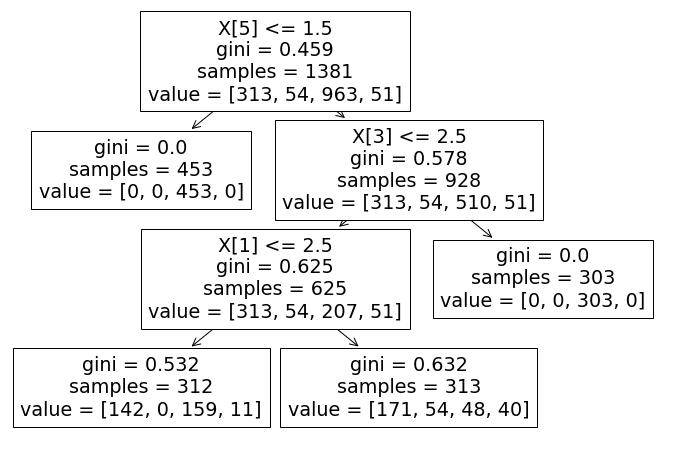

In [28]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dtree.fit(X_train, y_train)) 


The confusion matrix for the testing data is given below : 

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 36   0  35   0]
 [ 15   0   0   0]
 [  8   0 238   0]
 [ 12   0   2   0]]


The overall classification report is as follows :

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.51      0.51      0.51        71
        good       0.00      0.00      0.00        15
       unacc       0.87      0.97      0.91       246
       vgood       0.00      0.00      0.00        14

    accuracy                           0.79       346
   macro avg       0.34      0.37      0.36       346
weighted avg       0.72      0.79      0.75       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
